In [38]:
import seaborn as sns
import json as js
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [39]:
import csv
import glob, os

csv_files = glob.glob("/mnt/dataset/patchcore/monuseg_hyperparam/*/eval_results/results*.csv")
print(csv_files)




['/mnt/dataset/patchcore/monuseg_hyperparam/IM224_SAM_P1.0e-04_D1024-1024_PS-19_AN-1_S0/eval_results/results.csv', '/mnt/dataset/patchcore/monuseg_hyperparam/IM224_SAM_P1.0e-03_D1024-1024_PS-19_AN-1_S0/eval_results/results.csv', '/mnt/dataset/patchcore/monuseg_hyperparam/IM224_SAM_P1.0e-02_D1024-1024_PS-9_AN-1_S0/eval_results/results.csv', '/mnt/dataset/patchcore/monuseg_hyperparam/IM224_SAM_P1.0e-02_D1024-1024_PS-15_AN-1_S0/eval_results/results.csv', '/mnt/dataset/patchcore/monuseg_hyperparam/IM224_SAM_P1.0e-02_D1024-1024_PS-19_AN-1_S0/eval_results/results.csv', '/mnt/dataset/patchcore/monuseg_hyperparam/IM224_SAM_P1.0e-04_D1024-1024_PS-9_AN-1_S0/eval_results/results.csv', '/mnt/dataset/patchcore/monuseg_hyperparam/IM224_SAM_P1.0e-03_D1024-1024_PS-15_AN-1_S0/eval_results/results.csv', '/mnt/dataset/patchcore/monuseg_hyperparam/IM224_SAM_P1.0e-04_D1024-1024_PS-15_AN-1_S0/eval_results/results.csv']


In [40]:
import pandas as pd
import re
import shutil

from collections import defaultdict

score_dic = dict(
    score = [],
    prob = [],
    patchsize = [],
    run = []
)

runs = defaultdict(lambda: defaultdict(list))


for f in csv_files:
    run = os.path.split(os.path.split(f)[0])[-1]
    with open(f, newline='') as csvfile:
        data = pd.read_csv(csvfile)
        score = data['instance_auroc'][0]


        print(run, data['instance_auroc'][0])

        try:

            prob = re.findall(r"P[-+]?\d*\.?\d+[eE][-+]?\d+", f)[0]
            prob = float(prob[1:])
            print(prob)

            patchsize = re.findall(r"PS-\d+", f)[0]
            patchsize = int(patchsize[3:])
            print(patchsize)
        except Exception as e:
            print(e)
            continue
        # spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        # for row in spamreader:
        #     print(', '.join(row))

        score_dic['score'].append(score)
        score_dic['prob'].append(str(prob))
        score_dic['patchsize'].append(str(patchsize))
        score_dic['run'].append(run)

        runs[str(prob)][str(patchsize)].append((score, run))

        # src = os.path.split(f)[0]
        # dst = src.replace("monuseg_results", "monuseg_hyperparam")

        # # print(src, dst)
        # print(f)
        
        # shutil.move(src, dst)

        # os.remove(f)



eval_results 0.7058823529411764
0.0001
19
eval_results 0.7941676670668267
0.001
19
eval_results 0.7274809923969587
0.01
9
eval_results 0.7707082833133254
0.01
15
eval_results 0.7748999599839935
0.01
19
eval_results 0.609873949579832
0.0001
9
eval_results 0.7967987194877951
0.001
15
eval_results 0.629421768707483
0.0001
15


In [41]:
score_dic

{'score': [0.7058823529411764,
  0.7941676670668267,
  0.7274809923969587,
  0.7707082833133254,
  0.7748999599839935,
  0.609873949579832,
  0.7967987194877951,
  0.629421768707483],
 'prob': ['0.0001',
  '0.001',
  '0.01',
  '0.01',
  '0.01',
  '0.0001',
  '0.001',
  '0.0001'],
 'patchsize': ['19', '19', '9', '15', '19', '9', '15', '15'],
 'run': ['eval_results',
  'eval_results',
  'eval_results',
  'eval_results',
  'eval_results',
  'eval_results',
  'eval_results',
  'eval_results']}

In [42]:
for k, v in runs.items():
    for k_, v_ in v.items():
        u = np.unique([x[0] for x in v_])
        print(k, k_, len(v_), len(u), v_)

0.0001 19 1 1 [(0.7058823529411764, 'eval_results')]
0.0001 9 1 1 [(0.609873949579832, 'eval_results')]
0.0001 15 1 1 [(0.629421768707483, 'eval_results')]
0.001 19 1 1 [(0.7941676670668267, 'eval_results')]
0.001 15 1 1 [(0.7967987194877951, 'eval_results')]
0.01 9 1 1 [(0.7274809923969587, 'eval_results')]
0.01 15 1 1 [(0.7707082833133254, 'eval_results')]
0.01 19 1 1 [(0.7748999599839935, 'eval_results')]


<Axes: xlabel='prob', ylabel='score'>

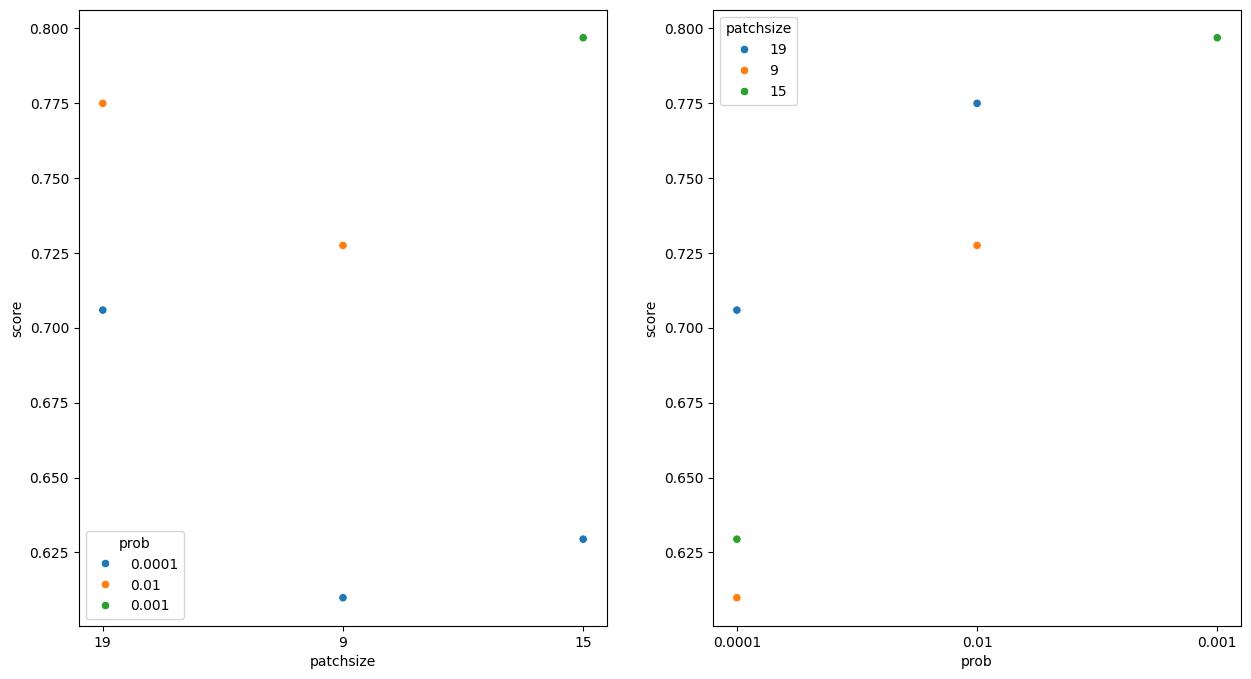

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.scatterplot(data = score_dic, y="score", hue="prob", x="patchsize", ax=ax[0])
sns.scatterplot(data = score_dic, y="score", x="prob", hue="patchsize", ax=ax[1])

# ax = plt.gca()
# ax[1].set_xscale('log')
# plt.show()